In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import nltk
from nltk.corpus import stopwords
import re
from collections import Counter
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
import joblib

file_name = 'desafio_indicium_imdb.csv'
df = pd.read_csv(file_name)

# Data Cleansing
df = df.drop('Unnamed: 0', axis=1)

df['Gross'] = df['Gross'].str.replace(',', '').str.replace('"', '').astype(float)
df['Runtime'] = df['Runtime'].str.replace(' min', '').astype(int)
df['Released_Year'] = df['Released_Year'].replace('PG', '1995').astype(int)

df['Certificate'].fillna('Not Rated', inplace=True)
df['Meta_score'].fillna(df['Meta_score'].median(), inplace=True)
df['Gross'].fillna(df['Gross'].median(), inplace=True)

# Predictive Modeling

features = ['No_of_Votes', 'Gross', 'Meta_score', 'Genre', 'Director', 'Star1']
target = 'IMDB_Rating'

X = df[features]
y = df[target]

categorical_features = ['Genre', 'Director', 'Star1']
preprocessor = ColumnTransformer(
    transformers=[
        ('cat', OneHotEncoder(handle_unknown='ignore'), categorical_features)
    ],
    remainder='passthrough'
)

model_pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('regressor', RandomForestRegressor(n_estimators=100, random_state=42))
])

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model_pipeline.fit(X_train, y_train)

joblib.dump(model_pipeline, 'imdb_rating_predictor.pkl')

C:\Users\rafas\AppData\Local\Temp\ipykernel_13500\3356144649.py:1: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd
C:\Users\rafas\AppData\Local\Temp\ipykernel_13500\3356144649.py:25: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df

['imdb_rating_predictor.pkl']

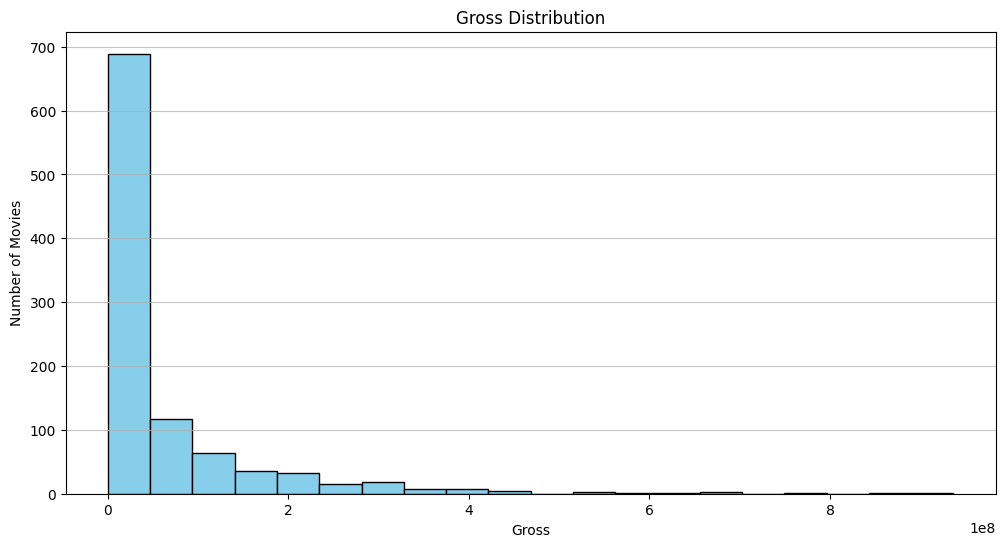

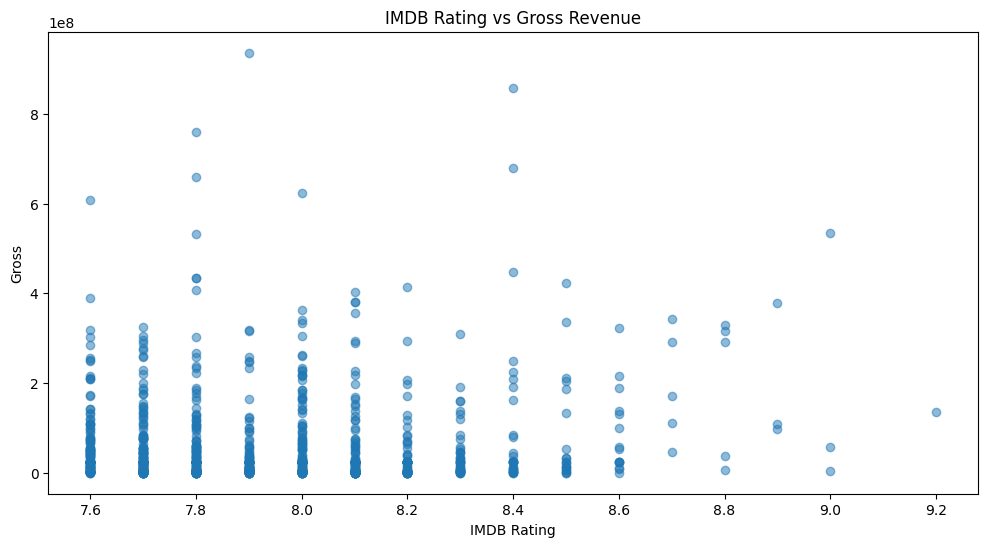

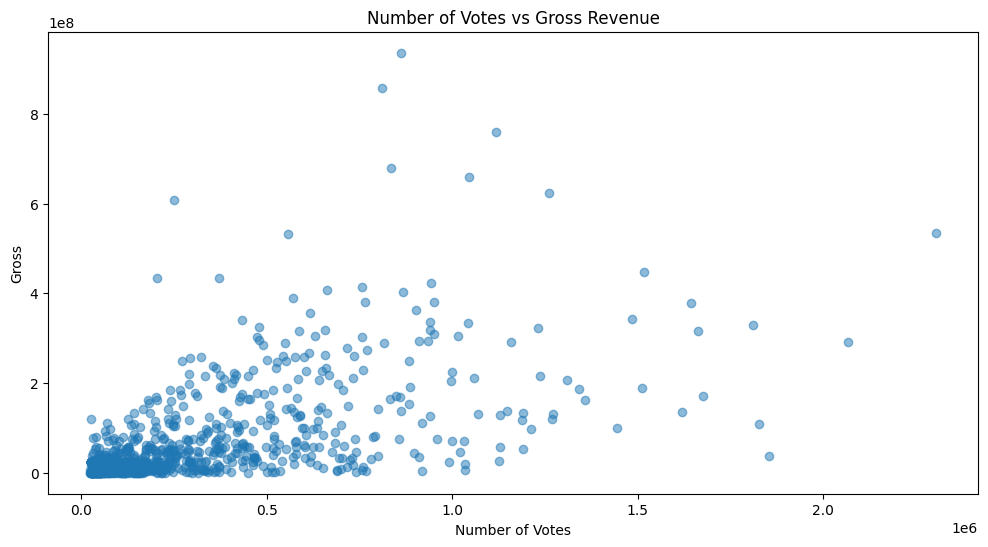

C:\Users\rafas\AppData\Local\Temp\ipykernel_13500\3027036704.py:32: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=avg_gross_by_director.values, y=avg_gross_by_director.index, palette='viridis')


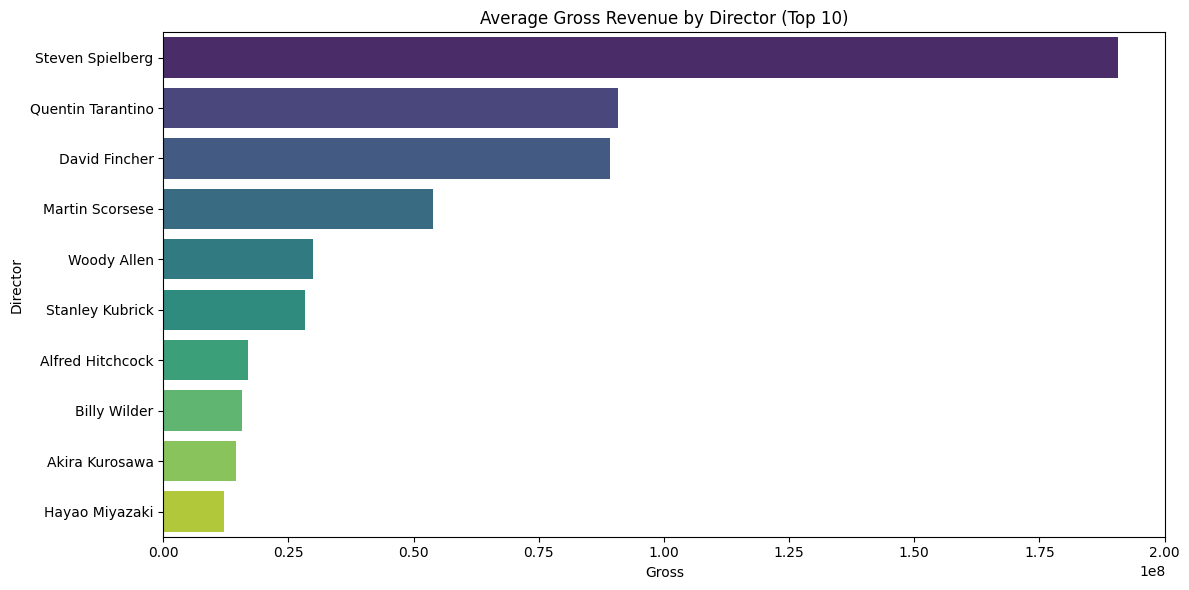

C:\Users\rafas\AppData\Local\Temp\ipykernel_13500\3027036704.py:44: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=avg_gross_by_star.values, y=avg_gross_by_star.index, palette='magma')


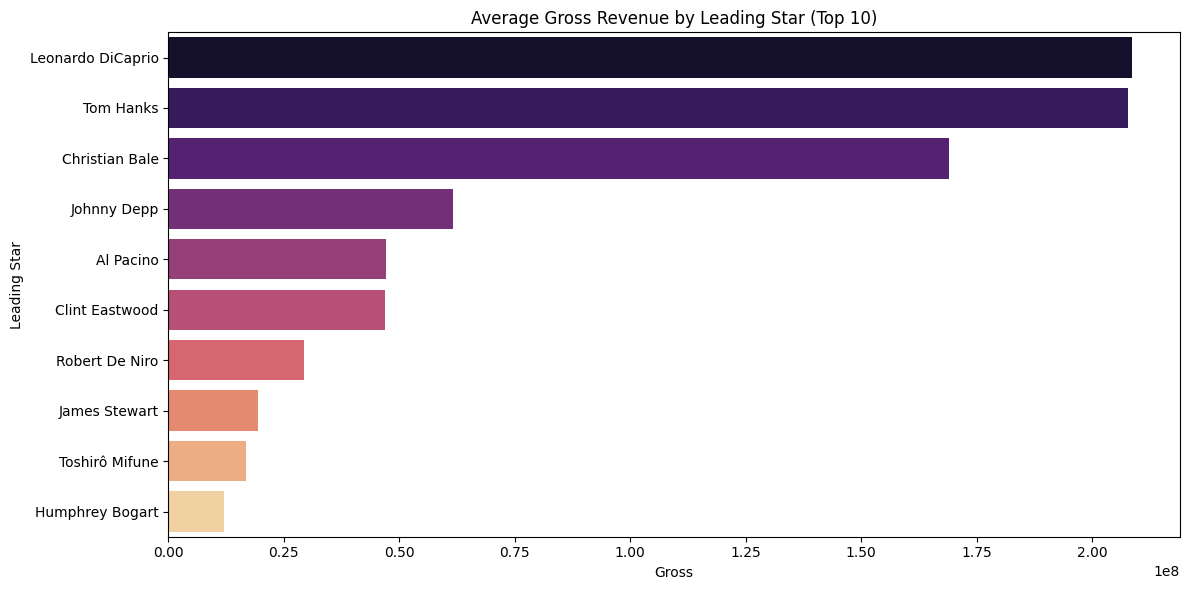

C:\Users\rafas\AppData\Local\Temp\ipykernel_13500\3027036704.py:55: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Genre', y='Gross', data=df_top_genres, palette='Set2')


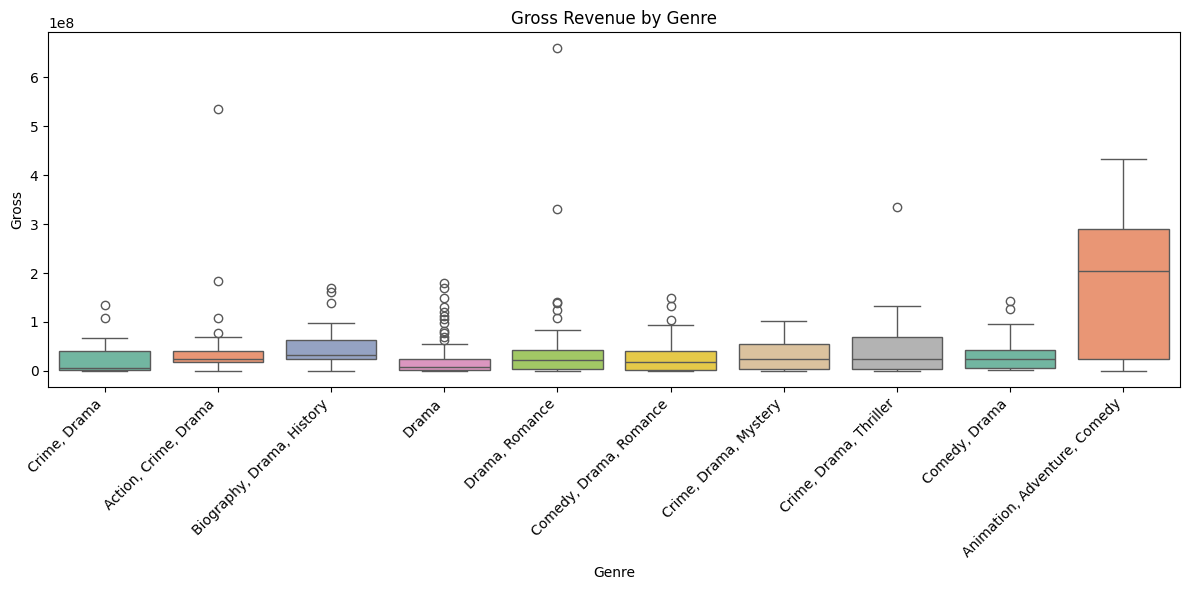

In [2]:
# Exploratory Data Analysis (EDA)

plt.figure(figsize=(12, 6))
plt.hist(df['Gross'], bins=20, color='skyblue', edgecolor='black')
plt.title('Gross Distribution')
plt.xlabel('Gross')
plt.ylabel('Number of Movies')
plt.grid(axis='y', alpha=0.75)
plt.savefig('gross_distribution.png')
plt.show()

plt.figure(figsize=(12, 6))
plt.scatter(df['IMDB_Rating'], df['Gross'], alpha=0.5)
plt.title('IMDB Rating vs Gross Revenue')
plt.xlabel('IMDB Rating')
plt.ylabel('Gross')
plt.savefig('imdb_rating_vs_gross.png')
plt.show()

plt.figure(figsize=(12, 6))
plt.scatter(df['No_of_Votes'], df['Gross'], alpha=0.5)
plt.title('Number of Votes vs Gross Revenue')
plt.xlabel('Number of Votes')
plt.ylabel('Gross')
plt.savefig('votes_vs_gross.png')
plt.show()

top_directors = df['Director'].value_counts().nlargest(10).index
df_top_directors = df[df['Director'].isin(top_directors)]
avg_gross_by_director = df_top_directors.groupby('Director')['Gross'].mean().sort_values(ascending=False)
plt.figure(figsize=(12, 6))
sns.barplot(x=avg_gross_by_director.values, y=avg_gross_by_director.index, palette='viridis')
plt.title('Average Gross Revenue by Director (Top 10)')
plt.xlabel('Gross')
plt.ylabel('Director')
plt.tight_layout()
plt.savefig('director_avg_gross.png')
plt.show()

top_stars = df['Star1'].value_counts().nlargest(10).index
df_top_stars = df[df['Star1'].isin(top_stars)]
avg_gross_by_star = df_top_stars.groupby('Star1')['Gross'].mean().sort_values(ascending=False)
plt.figure(figsize=(12, 6))
sns.barplot(x=avg_gross_by_star.values, y=avg_gross_by_star.index, palette='magma')
plt.title('Average Gross Revenue by Leading Star (Top 10)')
plt.xlabel('Gross')
plt.ylabel('Leading Star')
plt.tight_layout()
plt.savefig('star_avg_gross.png')
plt.show()

top_genres = df['Genre'].value_counts().nlargest(10).index
df_top_genres = df[df['Genre'].isin(top_genres)]
plt.figure(figsize=(12, 6))
sns.boxplot(x='Genre', y='Gross', data=df_top_genres, palette='Set2')
plt.title('Gross Revenue by Genre')
plt.xlabel('Genre')
plt.ylabel('Gross')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.savefig('genre_vs_gross.png')
plt.show()

In [3]:
# Natural Language Processing (NLP)
try:
    nltk.download('stopwords')
    stop_words = set(stopwords.words('english'))
except Exception as e:
    print(f"Error downloading the stopwords: {e}")
    print("Continuing without removing the stopwords.")
    stop_words = set()

all_synopses = ' '.join(df['Overview'].fillna(''))
all_synopses = all_synopses.lower()
all_synopses = re.sub(r'[^a-zA-Z\s]', '', all_synopses)


words = all_synopses.split()
filtered_words = [word for word in words if word not in stop_words and len(word) > 2]
word_counts = Counter(filtered_words)

print("The 20 most common words in the synopses are:")
print(word_counts.most_common(20))

The 20 most common words in the synopses are:
[('young', 132), ('man', 110), ('two', 103), ('life', 101), ('world', 78), ('new', 72), ('story', 63), ('war', 61), ('love', 61), ('woman', 60), ('family', 59), ('one', 57), ('find', 54), ('must', 50), ('finds', 47), ('help', 45), ('becomes', 44), ('boy', 42), ('friends', 41), ('girl', 39)]


[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\rafas\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [4]:
loaded_model = joblib.load('imdb_rating_predictor.pkl')

shawshank_data = {
    'Series_Title': ['The Shawshank Redemption'],
    'Released_Year': ['1994'],
    'Certificate': ['A'],
    'Runtime': ['142 min'],
    'Genre': ['Drama'],
    'Overview': ['Two imprisoned men bond over a number of years, finding solace and eventual redemption through acts of common decency.'],
    'Meta_score': [80.0],
    'Director': ['Frank Darabont'],
    'Star1': ['Tim Robbins'],
    'Star2': ['Morgan Freeman'],
    'Star3': ['Bob Gunton'],
    'Star4': ['William Sadler'],
    'No_of_Votes': [2343110],
    'Gross': ['28,341,469']
}

test_movie_df = pd.DataFrame(shawshank_data)

features_to_predict = ['No_of_Votes', 'Gross', 'Meta_score', 'Genre', 'Director', 'Star1']
X_new = test_movie_df[features_to_predict]

X_new['Gross'] = X_new['Gross'].str.replace(',', '').astype(float)

prediction = loaded_model.predict(X_new)

print(f"The predicted IMDB rating for 'The Shawshank Redemption' is: {prediction[0]:.2f}")

The predicted IMDB rating for 'The Shawshank Redemption' is: 8.77


C:\Users\rafas\AppData\Local\Temp\ipykernel_13500\3908790434.py:25: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_new['Gross'] = X_new['Gross'].str.replace(',', '').astype(float)
